In [53]:
import json # to work with json file format
from bs4 import BeautifulSoup # to parse html

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# read in file 
df = pd.read_json('data/bigfoot_data.json', lines = True)
df_test = pd.read_json('data/bigfoot_first100records.json', lines = True)

In [8]:
# clean id_col
def clean_id_col(df):
    # pull values(actual ids) from dictionaries
    i = 0
    for i in range(len(df._id)):
        df['_id'][i] = df._id[i].values()
    
    # convert from dict_val to pandas series
    id_series = pd.Series([], name='id')
    for dict_val in df['_id']:
        dict_val = list(dict_val)
        dict_ser = pd.Series([dict_val])
        id_series = pd.concat([id_series,dict_ser], axis=0)
    id_series.reset_index(drop=True, inplace=True)
    
    # convert series of lists to series of strings
    for i in range(len(id_series)):
        id_series[i] = ', '.join(id_series[i])
        
    # drop old, messy id column
    df['id'] = id_series
    df.drop(['_id'], axis=1, inplace=True)
    
clean_id_col(df_test)

In [10]:
cols = ['SUBMITTED', 'TITLE', 'YEAR', 'SEASON', 'MONTH',
                                  'STATE', 'COUNTY', 'LOCATION DETAILS', 'NEAREST TOWN',
                                  'NEAREST ROAD', 'OBSERVED', 'ALSO NOTICED',
                                  'OTHER WITNESSES', 'OTHER STORIES', 'TIME AND CONDITIONS',
                                  'ENVIRONMENT']

# save this for later
# for i, col in enumerate(cols):
#     cols[i] = col.lower()

html_df = pd.DataFrame(columns = cols)
html_df

,SUBMITTED,TITLE,YEAR,SEASON,MONTH,STATE,COUNTY,LOCATION DETAILS,NEAREST TOWN,NEAREST ROAD,OBSERVED,ALSO NOTICED,OTHER WITNESSES,OTHER STORIES,TIME AND CONDITIONS,ENVIRONMENT


In [13]:
# clean html block
for doc in df.html:
    doc_dict = dict()
    souped_doc = BeautifulSoup(doc, 'html.parser')
    spans = souped_doc.find_all('span', {'class': 'field'})
    
    try:
        doc_dict['SUBMITTED'] = spans[0].text
        doc_dict['TITLE'] = spans[1].text
    except:
        continue
        
    for sentence in souped_doc.find_all("p"):
        if any(span in sentence for span in spans):
            text = sentence.text
            #print (text)
            #print('------\n')
            list_info = text.split(': ',1)
            #print(list_info)
            doc_dict[list_info[0]] = list_info[1]
    
    html_df = html_df.append({k:doc_dict[k] for k in cols if k in doc_dict}, ignore_index=True)
    
newcols = []

for col in html_df.columns:
    newcols.append(col.lower())
    
html_df.columns = newcols

In [21]:
html_df.observed[np.random.randint(0,4500)]

"I was in rural Idaho, just north of a small town called Priest River. My friend and I go up to his ranch every year or so and just live there for a month. He has a dog that we bring along and like every other dog, he has the occasional need to relieve himself. So it was nighttime and it was my turn to take the dog out so I picked up an old Ruger 10-22 and brought the dog out for him to urinate. I was waiting outside when I saw a dark figure just beyond the tree line. It was massive, easily twice my height, and it just stood there, watching me. I would have taken a shot with my rifle but a tiny .22lr round wouldn't do anything to a creature that size. I just stood there looking back at it, when suddenly it broke out into a stride along the length of the tree line and it silently disappeared into the night. I was frozen in place until the dog tugged on the leash, beckoning me inside. I quickly gathered myself and rushed in through the door. I never saw clearly what was lurking in the da

In [79]:
filled_df = html_df.fillna('Other')
states = filled_df['state']
states

0        Alaska
1        Alaska
2        Alaska
3        Alaska
4        Alaska
5        Alaska
6        Alaska
7        Alaska
8        Alaska
9        Alaska
10       Alaska
11       Alaska
12       Alaska
13       Alaska
14       Alaska
15       Alaska
16       Alaska
17       Alaska
18       Alaska
19       Alaska
20      Alabama
21      Alabama
22      Alabama
23      Alabama
24      Alabama
25      Alabama
26      Alabama
27      Alabama
28      Alabama
29      Alabama
         ...   
7471      Other
7472      Other
7473      Other
7474      Other
7475      Other
7476      Other
7477      Other
7478      Other
7479      Other
7480      Other
7481      Other
7482      Other
7483      Other
7484      Other
7485      Other
7486      Other
7487      Other
7488      Other
7489      Other
7490      Other
7491      Other
7492      Other
7493      Other
7494      Other
7495      Other
7496      Other
7497      Other
7498      Other
7499      Other
7500      Other
Name: state, Length: 750

In [85]:
unique_elements, counts_elements = np.unique(states, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
  'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Idaho' 'Illinois'
  'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
  'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri'
  'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico'
  'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon'
  'Other' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
  'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
  'West Virginia' 'Wisconsin' 'Wyoming']
 [182 40 166 174 794 236 22 10 562 240 132 438 150 98 78 216 78 20 68 52
  408 134 42 258 86 28 14 22 118 80 196 158 8 301 82 236 259 108 5 38 11
  89 200 57 8 72 528 98 74 27]]


In [116]:
sorting = np.argsort(counts_elements)
sorting = np.flip(sorting)
counts_ordered = counts_elements[sorting]
states_ordered = unique_elements[sorting]
counts_ordered.max()

794

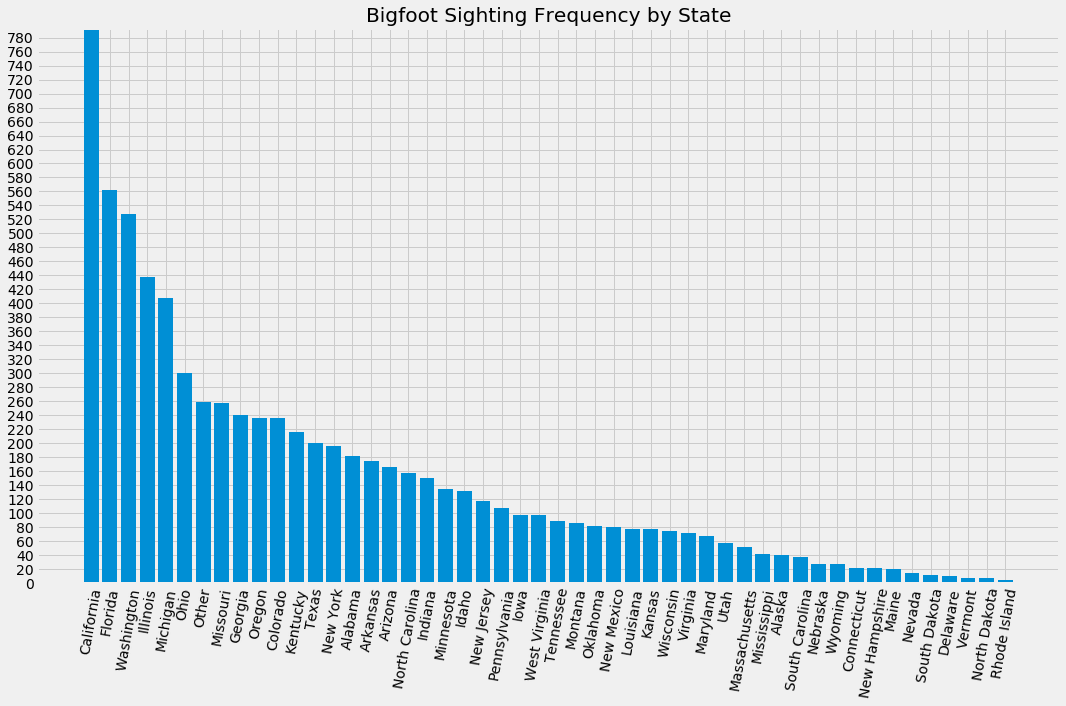

In [131]:
N = len(counts_ordered)
labels = list(states_ordered)
data = counts_ordered
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,10))
tickLocations = np.arange(N)
ax.bar(tickLocations, data)
ax.set_xticks(ticks=tickLocations)
ax.set_xticklabels(labels, rotation=80)
ax.set_yticks(range(794)[0::20])
ax.set_ylim((0,794))
ax.set_title("Bigfoot Sighting Frequency by State")
fig.tight_layout(pad=1)
fig.savefig('sightings_by_state.png', dpi=125)

['California',
 'Florida',
 'Washington',
 'Illinois',
 'Michigan',
 'Ohio',
 'Other',
 'Missouri',
 'Georgia',
 'Oregon',
 'Colorado',
 'Kentucky',
 'Texas',
 'New York',
 'Alabama',
 'Arkansas',
 'Arizona',
 'North Carolina',
 'Indiana',
 'Minnesota',
 'Idaho',
 'New Jersey',
 'Pennsylvania',
 'Iowa',
 'West Virginia',
 'Tennessee',
 'Montana',
 'Oklahoma',
 'New Mexico',
 'Louisiana',
 'Kansas',
 'Wisconsin',
 'Virginia',
 'Maryland',
 'Utah',
 'Massachusetts',
 'Mississippi',
 'Alaska',
 'South Carolina',
 'Nebraska',
 'Wyoming',
 'Connecticut',
 'New Hampshire',
 'Maine',
 'Nevada',
 'South Dakota',
 'Delaware',
 'Vermont',
 'North Dakota',
 'Rhode Island']